In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats

In [3]:
#Read in the data set.
clothing = pd.read_csv('/Users/spencerfogelman/Downloads/Womens Clothing E-Commerce Reviews.csv', index_col=0)

In [4]:
#Explore the data
clothing.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [5]:
#Explore the number of rows and columns
clothing.shape

(23486, 10)

In [6]:
#Explore the column data types, and see if there are any null values.
clothing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23486 entries, 0 to 23485
Data columns (total 10 columns):
Clothing ID                23486 non-null int64
Age                        23486 non-null int64
Title                      19676 non-null object
Review Text                22641 non-null object
Rating                     23486 non-null int64
Recommended IND            23486 non-null int64
Positive Feedback Count    23486 non-null int64
Division Name              23472 non-null object
Department Name            23472 non-null object
Class Name                 23472 non-null object
dtypes: int64(5), object(5)
memory usage: 2.0+ MB


In [40]:
#Find the frequency of reviews by department.
clothing['Department Name'].value_counts(dropna=False)

Tops        10468
Dresses      6319
Bottoms      3797
Intimate     1734
Jackets      1032
Trend         119
NaN            14
Name: Department Name, dtype: int64

The Trend Department seems to not be very popular based on the low number of overall reviews.

In [41]:
#Find the frequency of reviews by class.
clothing['Class Name'].value_counts(dropna=False)

Dresses       6319
Knits         4843
Blouses       3097
Sweaters      1428
Pants         1388
Jeans         1147
Fine gauge    1100
Skirts         945
Jackets        704
Lounge         691
Swim           350
Outerwear      328
Shorts         317
Sleep          228
Legwear        165
Intimates      154
Layering       146
Trend          119
NaN             14
Name: Class Name, dtype: int64

Again, the trend class of clothing does not seem very popular. The last two categories have too little reviews to work with, so they should be dropped.

In [9]:
#Remove categories with too few reviews.
clothing = clothing[~clothing['Class Name'].isin(['Casual bottoms', 'Chemises'])]


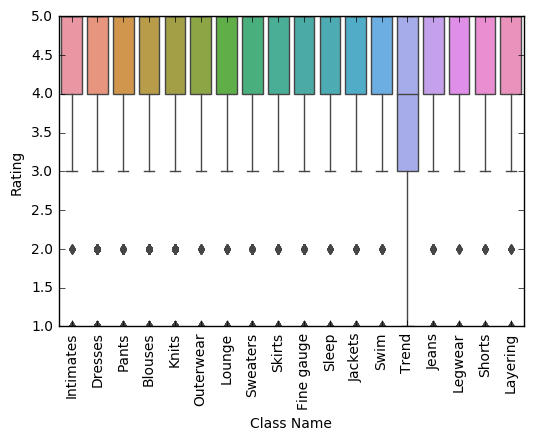

In [42]:
#Group the data by class name and look at the distribution of the ratings on a five point scale.
sns.boxplot(x='Class Name', y='Rating', data=clothing)
plt.xticks(rotation=90)
plt.show()

In [11]:
#Group the data by Class name and explore the median ratings of each.
clothing.groupby('Class Name')['Rating'].median()

Class Name
Blouses       5
Dresses       5
Fine gauge    5
Intimates     5
Jackets       5
Jeans         5
Knits         5
Layering      5
Legwear       5
Lounge        5
Outerwear     5
Pants         5
Shorts        5
Skirts        5
Sleep         5
Sweaters      5
Swim          5
Trend         4
Name: Rating, dtype: int64

    The medians are extremely high for a 5 point scale. It seems that people who like the clothing are more likely to leave reviews. However, because this is the only data we have, we will continue to work with the data. The trend department is the only department that does not have a 5.0 median rating. The e-commerce website should work on marketing to improve the trend department.

In [43]:
#Find the proportion of people who recommended each clothing item.
clothing.groupby('Class Name')['Recommended IND'].mean().sort_values(ascending=False)

Class Name
Layering      0.883562
Jeans         0.881430
Legwear       0.860606
Lounge        0.859624
Intimates     0.857143
Sleep         0.855263
Skirts        0.845503
Jackets       0.845170
Shorts        0.839117
Fine gauge    0.837273
Pants         0.832853
Knits         0.817675
Outerwear     0.817073
Blouses       0.810139
Dresses       0.808197
Swim          0.805714
Sweaters      0.800420
Trend         0.739496
Name: Recommended IND, dtype: float64

The trend department is also the least likely to be recommended.

In [14]:
#Create a categorical variable from age range.
clothing['Age Range'] = pd.cut(clothing['Age'], bins=5)
clothing['Age Range'].value_counts()

(34.2, 50.4]      11090
(17.919, 34.2]     6065
(50.4, 66.6]       5444
(66.6, 82.8]        803
(82.8, 99]           81
Name: Age Range, dtype: int64

Here we can see that there is a differing median rating based on age. We also see that there some age groups shop more at the store than others.

In [44]:
#Find the median value of each rating for each age range.
clothing.groupby(['Department Name', 'Age Range'])['Rating'].median()

Department Name  Age Range     
Bottoms          (17.919, 34.2]    5.0
                 (34.2, 50.4]      5.0
                 (50.4, 66.6]      5.0
                 (66.6, 82.8]      5.0
                 (82.8, 99]        5.0
Dresses          (17.919, 34.2]    5.0
                 (34.2, 50.4]      5.0
                 (50.4, 66.6]      5.0
                 (66.6, 82.8]      5.0
                 (82.8, 99]        5.0
Intimate         (17.919, 34.2]    5.0
                 (34.2, 50.4]      5.0
                 (50.4, 66.6]      5.0
                 (66.6, 82.8]      5.0
                 (82.8, 99]        5.0
Jackets          (17.919, 34.2]    5.0
                 (34.2, 50.4]      5.0
                 (50.4, 66.6]      5.0
                 (66.6, 82.8]      5.0
                 (82.8, 99]        5.0
Tops             (17.919, 34.2]    5.0
                 (34.2, 50.4]      5.0
                 (50.4, 66.6]      5.0
                 (66.6, 82.8]      5.0
                 (82.8, 99]     

In [38]:
#Create list of age ranges to iterate over for t tests.
clothing_ages = clothing.groupby(['Department Name', 'Age Range'])['Rating'].median()
age_range = list(clothing['Age Range'].value_counts().index)
print(age_range)
age_range.remove('(17.919, 34.2]')
print(age_range)

['(34.2, 50.4]', '(17.919, 34.2]', '(50.4, 66.6]', '(66.6, 82.8]', '(82.8, 99]']
['(34.2, 50.4]', '(50.4, 66.6]', '(66.6, 82.8]', '(82.8, 99]']


In [50]:
#Perform t tests to see if the medians are significantly different for the different age groups.
group1 = clothing[(clothing['Department Name'] == 'Trend') & (clothing['Age Range'] == '(17.919, 34.2]')] 
for i in range(len(age_range)):
    print(age_range[i])
    print(stats.ttest_ind(group1['Rating'], clothing[(clothing['Department Name'] == 'Trend') & (clothing['Age Range'] == age_range[i])]['Rating']))

(34.2, 50.4]
Ttest_indResult(statistic=-1.0184794630685332, pvalue=0.3115203955752372)
(50.4, 66.6]
Ttest_indResult(statistic=0.61295630323805994, pvalue=0.54252667786750441)
(66.6, 82.8]
Ttest_indResult(statistic=0.213072644789806, pvalue=0.83332517710492571)
(82.8, 99]
Ttest_indResult(statistic=nan, pvalue=nan)


/Users/spencerfogelman/anaconda/lib/python3.5/site-packages/numpy/core/_methods.py:82: RuntimeWarning: Degrees of freedom <= 0 for slice
  warnings.warn("Degrees of freedom <= 0 for slice", RuntimeWarning)


The medians are not signicantly different but for the purpose of this project I will continue my analysis.

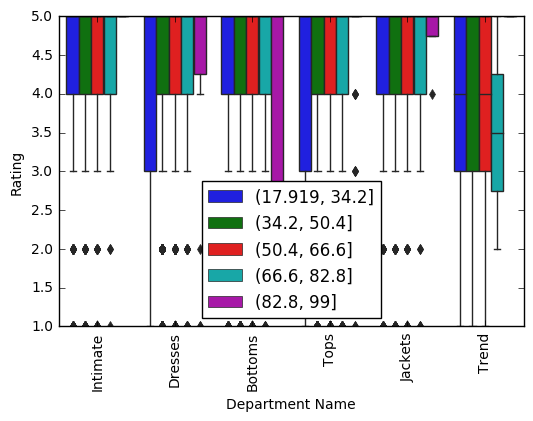

In [52]:
#Visualize the median distribution with a boxplot.
sns.boxplot(x='Department Name', y='Rating', hue='Age Range', data=clothing)
plt.xticks(rotation=90)
plt.legend(loc='lower center')
plt.show()

Here we can see that the two age groups we should focus our marketing on are 17 to 34 and 50 to 82. We also know that our marketing should prioritize the 17 to 34 year olds because they represent a much larger proportion of the customer base.

# Business Plan


    My business plan involves increasing the popularity and the sales of the Trend Department. This department has the lowest number of reviews by far out of all of the departments, from which it can be inferred it also has the lowest popularity. It also is the only class of clothing that does not have a median of 5 for its popularity rating. While the ratings do seem to be strangly high, signaling that there is probably a popularity bias (those who write reviews tend to like clothing more than the general population), I decided to overlook this and continue with my experiment since the number of actual reviews could still be a measure of popularity, and it is very low for the Trend Department. After looking at the age breakdown, we see that the only age groups that did not have a median of 5 stars for reviews were 17 to 34 year olds and 50 to 82 year olds. Since 17 to 34 year olds represent the second largest percentage of customers for the ecommerce website, I would focus my advertising plan on them.
    My first goal would be to increase the number of people looking at the trend page on the ecommerce website. I decided that email would be my choice of communication. I would already have access to people's emails since it is an ecommerce website and ordering online requries an email for confirmation. In my email I would give out an discount code for items exclusively in the Trend Department. My first experiment would be to create a control group and an experiment group. The control group would consist of past customers (17 to 34 years old females) that would not recieve an email. I would make sure both groups had a normal distribution of ages and equally represented different races. I would send out both emails on a Monday morning. The email would contain a link that would direct customers directly to the trend page on the ecommerce website. I would then wait until the following Monday and measure the click rates of each group. I would perform an AB test to see if the rates were significantly different. I hypothesize that the group that recieved the email would sign on the website more often than the control group. If this were not the case, I would change the email format and repeat the experiment.
    My second part of the experiment would be to measure the number of total clicks on each item on the Trend Webpage. I would also measure the duration of time between clicks on items.  I would randomly reorder the thumbnbails of the pictures to make sure that there was no bias towards items at the beginnings. I would look at the items that got the most clicks and also that were looked at the longest and advise the marketing department to produce more items like those. 
    Finally I would send out a poll to all previous customers who purchased anything from the trend department. I would incentivise them to answer the poll by giving customers store credit if they actually completed the poll. I would also make sure to look at the duration of time people spent on the poll to make sure they were not just randomly clicking, and if the duration was too short, I would discard those poll answers. I would find trends in the poll and use that information to also make improvement to the trend department. 
    A future experiment would be to compare the breakdown of number of reviews of the store with the new Trend inventory to the breakdown of reviews of the old inventory with a chi squared test. I would also use t tests to compare the median rating of the reviews for the Trend Department and also to compare the proportion of people who recommended items from the Trend Department.
    